## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [166]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [167]:
# loading the csv file into a dataframe
df = pd.read_csv('ab_data.csv')

In [168]:
# looking at the first five rows of the dataframe
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [169]:
# checking the numebr of rows in the data set and storing
# number of rows in  variable
number_rows = len(df)
# printing the number of rows
print('The number of rows in the dataset is {}'.format(number_rows))

The number of rows in the dataset is 294478


c. The number of unique users in the dataset.

In [170]:
# checking the number the unique values in the user_id column and storing 
# it in the variable
unique_users = df.user_id.nunique()
# pritnig the number of unique users
print('The number of unique users in the dataset is {}'.format(unique_users))

The number of unique users in the dataset is 290584


d. The proportion of users converted.

In [171]:
# checking the proportion o users converted and storing it in the variable
proportion = df[df['converted']==1].user_id.nunique()/number_rows
# printing the proportion of users converted
print('The proportion od users converted is {}'.format(proportion))

The proportion od users converted is 0.1194418598333322


e. The number of times the `new_page` and `treatment` don't line up.

In [172]:
# checking the number of rows where new_page and treatment do not line up
# storing it in a variable
not_lineup = len(df[((df['group'] == 'treatment') == (df['landing_page'] != 'new_page')) ])

print('The new_page and treatment dont line up {} times'.format(not_lineup))

The new_page and treatment dont line up 3893 times


f. Do any of the rows have missing values?

In [173]:
# checking an printing the number of null values
null = df.isnull().values.sum()
print('The number of missing values in the dataset is {}'.format(null))

The number of missing values in the dataset is 0


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [174]:
# creating a new dataframe without the rows in which treatment is not aligned with new_page
# or control is not aligned with old_page
df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) ]

In [175]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [176]:
# checking the number of unique value in user_id column and storing it in 
#a variable
unique_users2 = df2.user_id.nunique()
# printing the number of unique user_ids
print('The unique number of users_id in the df2 is {}'.format(unique_users2))

The unique number of users_id in the df2 is 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [177]:
# selecting the repeat user and store in a varible
repeat_user = df2.user_id.value_counts()[0:1]
print('The repeat user is {}'.format(repeat_user))

The repeat user is 773192    2
Name: user_id, dtype: int64


c. What is the row information for the repeat **user_id**? 

In [178]:
# selceting rows by user_id
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [179]:
# removing a row from the dataframe by index
df2.drop([2893], inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [180]:
# calculating the probality of an individual converting
prob =df2.converted.mean()
# printing the probality of conversion
print('The probality of an individual converting is {}'.format(prob))

The probality of an individual converting is 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [181]:
# calculating the probality of an individual in the control group
#converting and store it in a variable
prob_contr =df2.query("group=='control'").converted.mean()
# printing the probality of conversion
print('The probality of an individual converting in the control group converting is {}'.format(prob_contr))

The probality of an individual converting in the control group converting is 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [182]:
# calculating the probality of an individual in the treatment group
#converting and store it in a variable
prob_treat =df2.query("group=='treatment'").converted.mean()
# printing the probality of conversion
print('The probality of an individual converting in the treatment group converting is {}'.format(prob_treat))

The probality of an individual converting in the treatment group converting is 0.11880806551510564


d. What is the probability that an individual received the new page?

In [183]:
# calculating the probability that individual received a the new page
prob_new =len(df2.query("landing_page == 'new_page'"))/len(df2)
# printing the probality of receiving the new page
print('The probality of an individual receiving a new page is {}'.format(prob_new))

The probality of an individual receiving a new page is 0.5000619442226688


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.



The probability for the individual converting when given the old page is slightly higher than when given the new one. However, this difference is not very noticeable. The probability of conversion of 0.1204 when the individual received the control page means vs. probability 0.1188 for the treatment page. So basing on the data provided, it means that on 10000 individuals when given a control
the page there will be 1204 conversions, vs. 1188 conversions when given the treatment page.


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

$H_0:$  $p_{old}$ >= $p_{new}$


$H_1:$  $p_{new}$ > $p_{old}$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [184]:
p_new = df2.converted.mean()
p_new # displaying the convart rate for the treatment

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [185]:
p_old = df2.converted.mean()
p_old #  displaying the convert rate for the control

0.11959708724499628

c. What is $n_{new}$?

In [186]:
n_new = len(df2.query('landing_page=="new_page"'))
n_new   #displaying the number of individuals receiving new page       

145310

d. What is $n_{old}$?

In [187]:
n_old = len(df2.query('landing_page=="old_page"'))
n_old #displaying the number of individuals receiving old page

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [188]:
# simulating n_new transactions
new_page_converted = np.random.choice(a=[1,0], size=n_new, replace=True, p=[p_new, 1-p_new])


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [189]:
# simulating n_old transactions
old_page_converted = np.random.choice(a=[1,0], size=n_old, replace=True, p=[p_old, 1-p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [190]:
# calculating difference in convert rate for the new page and old page 
# under the null hypothesis
new_page_converted.mean()- old_page_converted.mean()

0.00019085404368317238

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [191]:
# creating an empty list
p_diffs = []
for i in range(10000):
    new_page_convert = np.random.choice(a=[1,0], size=n_new, replace=True, p=[p_new, 1-p_new])
    old_page_convert = np.random.choice(a=[1,0], size=n_old, replace=True, p=[p_old, 1-p_old])
    # appending a list with a difference in convert rates under the null 
    p_diffs.append(new_page_convert.mean() - old_page_convert.mean()) 
# transfotming python list into a numpy array    
p_diffs = np.array(p_diffs) 

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

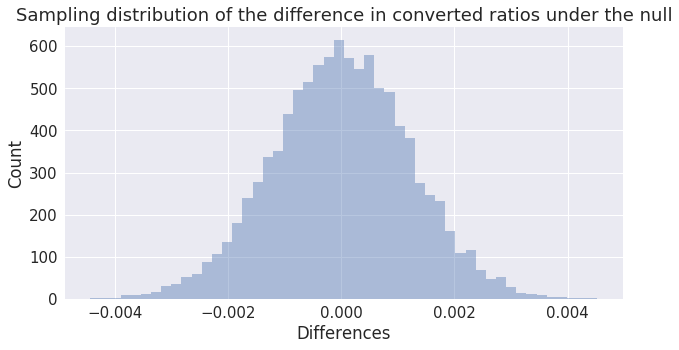

In [192]:
sns.set(font_scale=1.5)
# ploting histogram with distribution
f, g =plt.subplots(figsize=(10,5))
g = sns.distplot(p_diffs, kde=False);
g.set_title('Sampling distribution of the difference in converted ratios under the null')
g.set_xlabel('Differences');
g.set_ylabel('Count');

"The Central Limit Theorem states that with a large enough sample size the sampling distribution of the mean will be normally distributed". 
The Central Limit Theorem has got also application in distribution of diffirence in  proportions: p1-p2.
So as expected we can see that differences in proportions are normally distributed.

Let's have a look when the sample size is not"large enough"

In [193]:
p_diffs1 = []
for i in range(57):
    new_page_converted = np.random.choice(a=[1,0], size=n_new, replace=True, p=[p_new, 1-p_new])
    old_page_converted = np.random.choice(a=[1,0], size=n_old, replace=True, p=[p_old, 1-p_old])
    p_diffs1.append(new_page_converted.mean() - old_page_converted.mean())                                
p_diffs1 = np.array(p_diffs1) 

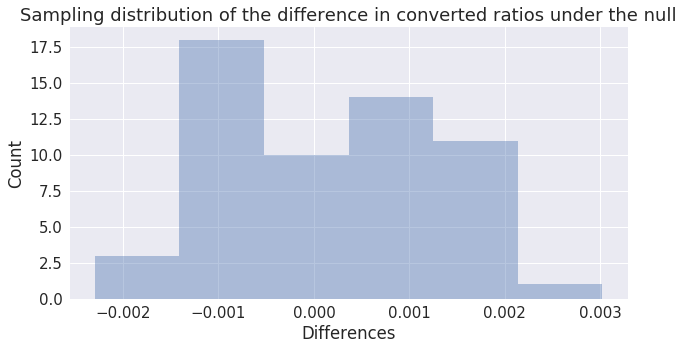

In [194]:
# ploting histogram with distribution
f, g =plt.subplots(figsize=(10,5))
g = sns.distplot(p_diffs1, kde=False);
g.set_title('Sampling distribution of the difference in converted ratios under the null')
g.set_xlabel('Differences');
g.set_ylabel('Count');

In this case we can see that the sampmling distribiution doesn't follow normal distribution.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [195]:
obs_diff = prob_treat - prob_contr
obs_diff # difference in conversion rate between the treatment and control group

-0.0015782389853555567

In [256]:
obs_diff = prob_treat - prob_contr
# compute p-value
(p_diffs > obs_diff).mean()


0.0

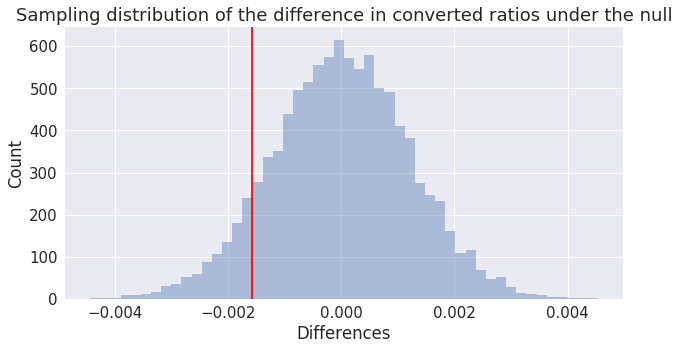

In [197]:


# ploting histogram with distribution
f, g =plt.subplots(figsize=(10,5))
g = sns.distplot(p_diffs, kde=False);
g.set_title('Sampling distribution of the difference in converted ratios under the null')
g.set_xlabel('Differences');
g.set_ylabel('Count');
plt.axvline(obs_diff, c='red', );

As we are testing right tailed hypothesis we can see that the are right to the red line will represent the p-value. So just by the visual inspections we can determine that the p-value is much greater than 50%.

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?


We have calculataed the p-value. That is the probability of accurence of statistics if the null hypothesis is true. 
The p-value = 0.905 is much higher than alpha.
So we failed to reject the null hypothesis

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [198]:
import statsmodels.api as sm

convert_old = len(df2[(df2['group']=='control') & (df2['converted']==1)])
convert_new = len(df2[(df2['group']=='treatment') & (df2['converted']==1)])
convert_old, convert_new, n_old, n_new 


(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [199]:

z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old , n_new],
                                             alternative='smaller')



n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [200]:
z_score, p_value 

(1.3109241984234394, 0.90505831275902449)

In [201]:
from scipy.stats import norm

norm.cdf(z_score),norm.ppf(1-(0.05/2))
# 0.90505831275902449 # Tells us how significant our z-score is


# 1.959963984540054 # Tells us what our critical value at 95% confidence is

(0.90505831275902449, 1.959963984540054)

The z-score is lower than critical valu et 95% confidence level. So we also failed to reject the null hypothesis.

P-value calculated using the built-in method is almost identical, with those using bootsrapping.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

## Logistic regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [202]:
# adding an intercept column to the dataframe
df2['intercept'] =1

mapper = {'treatment':1, 'control':0}
# creating a new columns with 0,1 values depending 
#wether user is from the control or treatment group
df2['ab_page'] = df2.group.map(mapper)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [203]:
# deleting the group column from the dataframe
df2.drop('group',inplace=True, axis=1)
# dislplaying first two rows of the updated dataframe
df2.head(2)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,user_id,timestamp,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,old_page,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [204]:
# importing necessary package
import statsmodels.api as sm

log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [205]:
# displaying results of the logistic regression model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 27 Apr 2018   Pseudo R-squ.:               8.077e-06
Time:                        09:25:14   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

As we can see only intercept is statitically siginficant.
ab_page is not statistically siginificant as the p-value is 0.19.
So we failed to reject the null hypothesis using the logistic regression model.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  

**Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?



P-value asociated the **ab_page** page is 0.19. It means it is not statically significant in predicting conversion.

In the logisitic regression method  we are testing different hypotheses our null hypothesis 

$H_0:$  $p_{old}$ = $p_{new}$ 

$H_1:$  $p_{old}$ $\neq$ $p_{new}$

Let's try to  compute the p-value using the built-in method, testing the same null hypotheses as in the logistic regression model.

In [241]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old , n_new],
                                             )

In [208]:
p_value # we can see that the p-value using the logistic regression model 
# when testing two tailed hypothesis is almost identical

0.18988337448195103

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Other factors that can influance the coversion can by the type of platform
used( mobile, tablet, PC), time of the day, day of the week, source of the traffic(oragnic or paid).

Adding additional variables into the model may increase the accuracy of the model. Ohter variables may be statistically significant.
However, this may lead to overfitting, which means we will bulid the model which is more accurate with the training data but it will be less accurate
when we will work with testing data.
The other caveat is multicollinearity - the independent variables may be correlated with each other. So variables in separated models may be correlated positevly with the dependent variabel, once they put together in one model the correlation may be lost.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [209]:
# reading a csv file and loading it into a dataframe
countries = pd.read_csv('countries.csv')
# displaying first five rows of the dataframe
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [210]:
# creating new dataframe by marging d2 and countries
df3 =df2.merge(countries, on='user_id')
df3.head(3)


,user_id,timestamp,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,new_page,0,1,1,US


In [211]:
df3.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [212]:
# creating a dummy variables for the column -country
df3 =pd.get_dummies(df3,prefix=['country'], columns=['country'])
# deleting one column from the dataframe
df3.drop('country_CA', inplace=True, axis=1)
df3.head()

,user_id,timestamp,landing_page,converted,intercept,ab_page,country_UK,country_US
0,851104,2017-01-21 22:11:48.556739,old_page,0,1,0,0,1
1,804228,2017-01-12 08:01:45.159739,old_page,0,1,0,0,1
2,661590,2017-01-11 16:55:06.154213,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,old_page,1,1,0,0,1


In [242]:
# creating a logistic regression model
log_mod1 = sm.Logit(df3['converted'], df3[['intercept','ab_page' ,'country_UK','country_US']])
results1 = log_mod1.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [255]:
# displaying results
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 27 Apr 2018   Pseudo R-squ.:               2.323e-05
Time:                        11:13:02   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
country_UK     0.0506      0.028      1.784      0.074      -0.005       0.106
country_US     0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

As we can see only intercept is statitically siginficant.
Other factors are not statistically siginificant as the p-value is greater than 0.05 for each of them.
So we failed to reject the null hypothesis using the logistic regression model.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [215]:
# creating new columns reperenting interactions between countries and pages
df3['us_new'] = df3['country_US']*df3['ab_page']
df3['uk_new'] = df3['country_UK']*df3['ab_page']
# displaying first three rows of the updated dataframe
df3.head(3)

,user_id,timestamp,landing_page,converted,intercept,ab_page,country_UK,country_US,us_new,uk_new
0,851104,2017-01-21 22:11:48.556739,old_page,0,1,0,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,old_page,0,1,0,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,new_page,0,1,1,0,1,1,0


In [216]:
# creating a model
log_mod2 = sm.Logit(df3['converted'], df3[['intercept','ab_page',
                                           'country_UK', 'country_US','us_new','uk_new']])
results2 = log_mod2.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [217]:
# display results
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Fri, 27 Apr 2018   Pseudo R-squ.:               3.482e-05
Time:                        09:25:16   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
country_UK     0.0118      0.040      0.296      0.767      -0.066       0.090
country_US     0.0175      0.038      0.465      0.642      -0.056       0.091
us_new         0.0469      0.054      0.872      0.383      -0.059       0.152
uk_new         0.0783      0.057      1.378      0.168      -0.033       0.190
==============================================================================
"""

Again none of the factors, bar the intercept, are statistically significant so we failed to reject the null hypothesis.

## Part IV

Let try to look at some more more metrics. As dataset provides the time of viewing we can break down the conversion rate by time of the day.


In [218]:
# changing format to datetime
df3['timestamp'] = pd.to_datetime(df3['timestamp'])


In [219]:
# checking the last viewing in the experiement
df3['timestamp'].max(),df3['timestamp'].min()

(Timestamp('2017-01-24 13:41:54.460509'),
 Timestamp('2017-01-02 13:42:05.378582'))

In [220]:
# checking the first viewing in the experiment
df3['timestamp'].max()-df3['timestamp'].min()


Timedelta('21 days 23:59:49.081927')

So the experiment ran just over three weeks

In [221]:
# creating evening mapper

def evening_mapper(x):
    """
    This function determine whether the page
    viewing takes place in the evening - between 5PM-23PM
    Args: datetime object
    Returns: 0 no-evening or 1 for evening
    """
    if x.hour>17  and x.hour<23 :
        return 1
    else:
        return 0
                

In [222]:
# creating a new variable that id afternoon 1 else 0
df3['evening'] =df3['timestamp'].map(after_mapper)

In [223]:
# creating a model
log_mod3 = sm.Logit(df3['converted'], df3[['intercept','ab_page',
                                            'evening']])
results3 = log_mod3.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [224]:
# displaying results
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 27 Apr 2018   Pseudo R-squ.:               1.062e-05
Time:                        09:25:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.3230
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9910      0.009   -231.777      0.000      -2.008      -1.974
ab_page       -0.0150      0.011     -1.308      0.191      -0.037       0.007
evening        0.0103      0.014      0.737      0.461      -0.017       0.038
==============================================================================
"""

So again the results are not statistically significant.

Let us creat a intercation between variables, evening and ab_page

In [225]:
# creating a new column with interaction between page and evening
df3['eve_new'] = df3['evening']*df3['ab_page']


In [226]:
# creating a logistic regerssion model
log_mod4 = sm.Logit(df3['converted'], df3[['intercept','ab_page','evening','eve_new']])
results4 = log_mod4.fit()
# displaying results
results4.summary()

Optimization terminated successfully.
         Current function value: 0.366101
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 27 Apr 2018   Pseudo R-squ.:               5.641e-05
Time:                        09:25:19   Log-Likelihood:            -1.0638e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                  0.007374
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9818      0.009   -219.094      0.000      -2.000      -1.964
ab_page       -0.0333      0.013     -2.592      0.010      -0.059      -0.008
evening       -0.0335      0.020     -1.677      0.094      -0.073       0.006
eve_new        0.0877      0.028      3.121      0.002       0.033       0.143
==============================================================================
"""

In [238]:
np.exp(-0.0333)

0.96724834155603689

In [239]:
np.exp(-0.0335 + 0.0877)

1.0556957201866104

If the the view of the page is outside of the evening hours the conversion  of the new page is 0.967 times as likely as the coneversion of the old page holding all other variables constant.

The evening conversion is 1.055 times as likely for the new page than for the old page holding all other variables constant.

## Let's try to test hypothesis using bootstrapping.

I would like to test if the evening conversion rate  for the new page is better the evening conversion rate of the old page.

My null hypothesis is that the evening conversion rate of the new page is no better than the old page.

$H_0:$  $p_{old}$ >= $p_{new}$

My alternative hypothesis is than the evening conversion rate is better of the new page is better than the old page.

$H_1:$  $p_{new}$ > $p_{old}$

However, as we are testing another metric we should look again on our alpha.
Originally, it was set to 0.05. According to Bonferroni correction, when testing mltiply metrics we should divide aplha by the number of tests. This will help to avoid situations testing multiply metrics by chance one of those tests will produce statistically significant results.
So I decided to set the alpha for this test at 0.025.

In [229]:
# creating a dataframe with rows only for the evening viewing
df_eve =df3.query('evening==1')

In [ ]:
# checking the number of rows with new page
eve_new= len(df_aft.query('ab_page==1'))
# checking the number of rows with old page
eve_old= len(df_aft.query('ab_page==0'))
# calculating the convert rate
eve_prob =df_aft.converted.mean()

In [252]:
diffs_evening = []
# simuliating 10000 difference between the new page and old page convert rate 
# under the null hypothesis
for _ in range(10000):
    
    new_evn_con = np.random.choice(a=[1,0], size=eve_new, replace=True, p=[eve_prob, 1-eve_prob]).mean()
    old_evn_con = np.random.choice(a=[1,0], size=eve_old, replace=True, p=[eve_prob, 1-eve_prob]).mean()
    diffs_evening.append(new_evn_con - old_evn_con)
    


In [243]:
# changing the python list into a numpy array
diffs_evening =np.array(diffs_evening)

In [253]:
# calculating the convert rate for the new page
eve_treat =df_eve.query("ab_page==1").converted.mean()
eve_treat

0.12336280832391464

In [254]:
# calculating the convert rate for the old page
eve_contr =df_eve.query("ab_page==0").converted.mean()
eve_contr

0.11760651217750935

In [248]:
# calculating the difference between the convert rate for the new page and
# the old one
obser_eve = eve_treat-eve_contr

In [249]:
obser_eve # difference between the convert rate for the new page and
# the old one

0.0057562961464052848

In [250]:
# calaculating the p-value.
(diffs_evening>obser_eve).mean()

0.014800000000000001

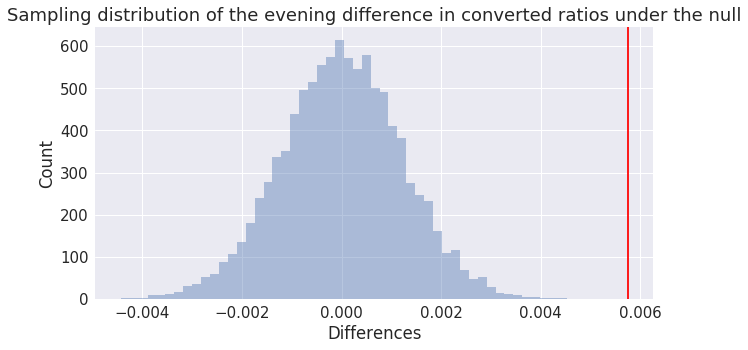

In [251]:
# ploting histogram with distribution
f, g =plt.subplots(figsize=(10,5))
g = sns.distplot(p_diffs, kde=False);
g.set_title('Sampling distribution of the evening difference in converted ratios under the null')
g.set_xlabel('Differences');
g.set_ylabel('Count');
plt.axvline(obser_diff, c='red', );

As our p-value is lesser than our alpha(0.025) we can accept the alternative hypothesis. As there is a statistical evidence that the evening  conversion rate is higher for the new page than for the old one.

<a id='conclusions'></a>
## Conclusions

The initial test has not provide any statistical evidence that the new page performed better that the old one. As the test was run for just over three weeks I think that the lenght was adequate. Also the number of users over almost 300 thousand was also satisfactory. However, what was really missing in the data set was the platform on which the page was viewed.

The A/B test for the evening conversion yield the statistically significant results. The coversion rate for the new page 0.1233 vs.
coversion rate for the old page 0.117. 

Yet, it would not be pratical to change the display of the page throughout the day. Anyway,  this finding may lead ti discover more interesting insight and it should be invetisgate further. As I do not know what type e-commerce business I am looking at I cannot speculate further.



## References

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/